
 Neutral Sentiment :302

 Positive Sentiment :164

 Negative Sentiment :23
                         tweet id  \
2018-05-03 01:00:00  9.920000e+17   
2018-05-03 01:00:00  9.920000e+17   
2018-05-03 03:00:00  9.920000e+17   
2018-05-03 04:00:00  9.920000e+17   
2018-05-03 05:00:00  9.920000e+17   

                                                            tweet_text  \
2018-05-03 01:00:00  BOUGHT [ #XRPBTC | #binance | Price: 0.0000927...   
2018-05-03 01:00:00  RT @litenettcom: With an audience of 10 millio...   
2018-05-03 03:00:00  #Cryptos: \r\n\r\n#BTC 9270.10$ | 7754.53€\r\n...   
2018-05-03 04:00:00  RT @tihosay: Tihosay Pre-ICO will begin April ...   
2018-05-03 05:00:00  #Cryptos: \r\n\r\n#BTC 9252.40$ | 7739.73€\r\n...   

                     Sentiment  Close Price  Price Difference Class  
2018-05-03 01:00:00        0.0      9221.87                       1  
2018-05-03 01:00:00        0.0      9221.87                       1  
2018-05-03 03:00:00        0.0      9222.94   

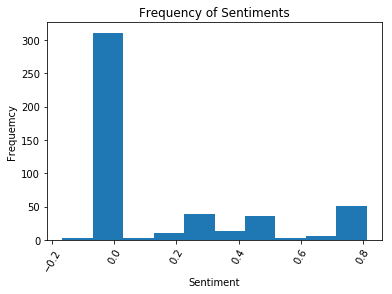

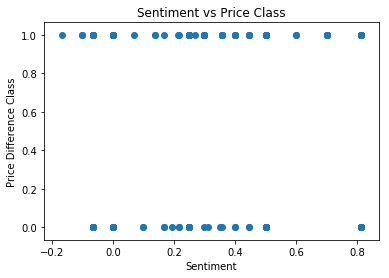

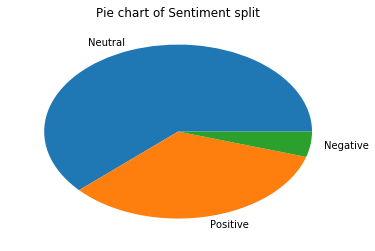

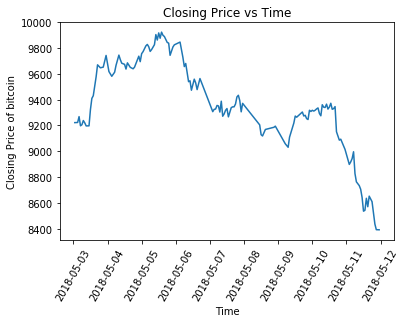

In [2]:
import pandas as pd
from textblob import TextBlob
from datetime import datetime,timedelta
import matplotlib.pyplot as plt


tweet = pd.read_csv('combined.csv',parse_dates=True)
price = pd.read_csv('Bitcoin Prices.csv')


tweet['Time'] = tweet['Time'].astype('datetime64[s]')

tweet.index = pd.to_datetime(tweet['Time']- timedelta(hours=1))
tweet.index = tweet.index.round('1H')

price['Date'] = price['Date'].astype('datetime64[s]')

price.index = pd.to_datetime(price['Date'])

price.index = price.index.round('1H')

senti = []

for i in tweet['tweet_text']:
    
    
    senti.append(TextBlob(i).polarity)
    

tweet['Sentiment'] = senti


count_0 = 0
count_pos = 0
count_neg =0

for j in senti:
    
    if j==0:
        count_0+=1
        
    elif j>0:
        
    
        count_pos+=1
    else :
        
        count_neg+=1


print('\n Neutral Sentiment :' + str(count_0))

print('\n Positive Sentiment :' + str(count_pos))

print('\n Negative Sentiment :' + str(count_neg))

senti_list = [count_0,count_pos,count_neg]

df = tweet.merge(price,left_index=True,right_index=True,how='inner')


df.drop(['Date','Date.1','Time'],axis=1,inplace=True)

print(df.head())

plt.hist(df['Sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Frequemcy')
plt.title('Frequency of Sentiments')
plt.xticks(rotation=60)
plt.show()

plt.scatter(df['Sentiment'],df['Price Difference Class'])
plt.xlabel('Sentiment')
plt.ylabel('Price Difference Class')
plt.title('Sentiment vs Price Class')
plt.show()


plt.pie(senti_list,labels=['Neutral','Positive','Negative'])
plt.title('Pie chart of Sentiment split')
plt.show()

plt.plot(df['Close Price'])
plt.xlabel('Time')
plt.ylabel('Closing Price of bitcoin')
plt.title('Closing Price vs Time')
plt.xticks(rotation=60)
plt.show()


As expected, a majority of sentiments are neutral or 0 in polarity. Upon further investigation it was noted that most tweets in May 2018 are images of charts indicating or naively predicting the prices of bitcoin. This type of dataset is beyond the scope of this project.

Second most observed sentiment in the dataset was positive in nature at 33.5 % of tweets showing polarity greater than 0

Lastly, only 4% of tweets indicated negative sentiment with polarity less than 0. These features are best represented by the pie plot.

The sentiment vs price class does not indicate an obvious correlation. For price class 1, the evaluated sentiments span all possible ranges i.e. negative to positive. For price class 0, the evaluated sentiments are relatively less spaced out but, nonetheless, fall in all possible ranges of sentiments.


